In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dt

In [3]:
df=pd.read_csv("seattle.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [15]:
df["date"]=pd.to_datetime(df['date'],format='%Y-%m-%d')

In [17]:
df["date"]

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, Length: 1461, dtype: datetime64[ns]

In [19]:
df=df.set_index('date')

In [21]:
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


In [23]:
df['temp_max_ma']=df['temp_max'].rolling(window=30).mean()

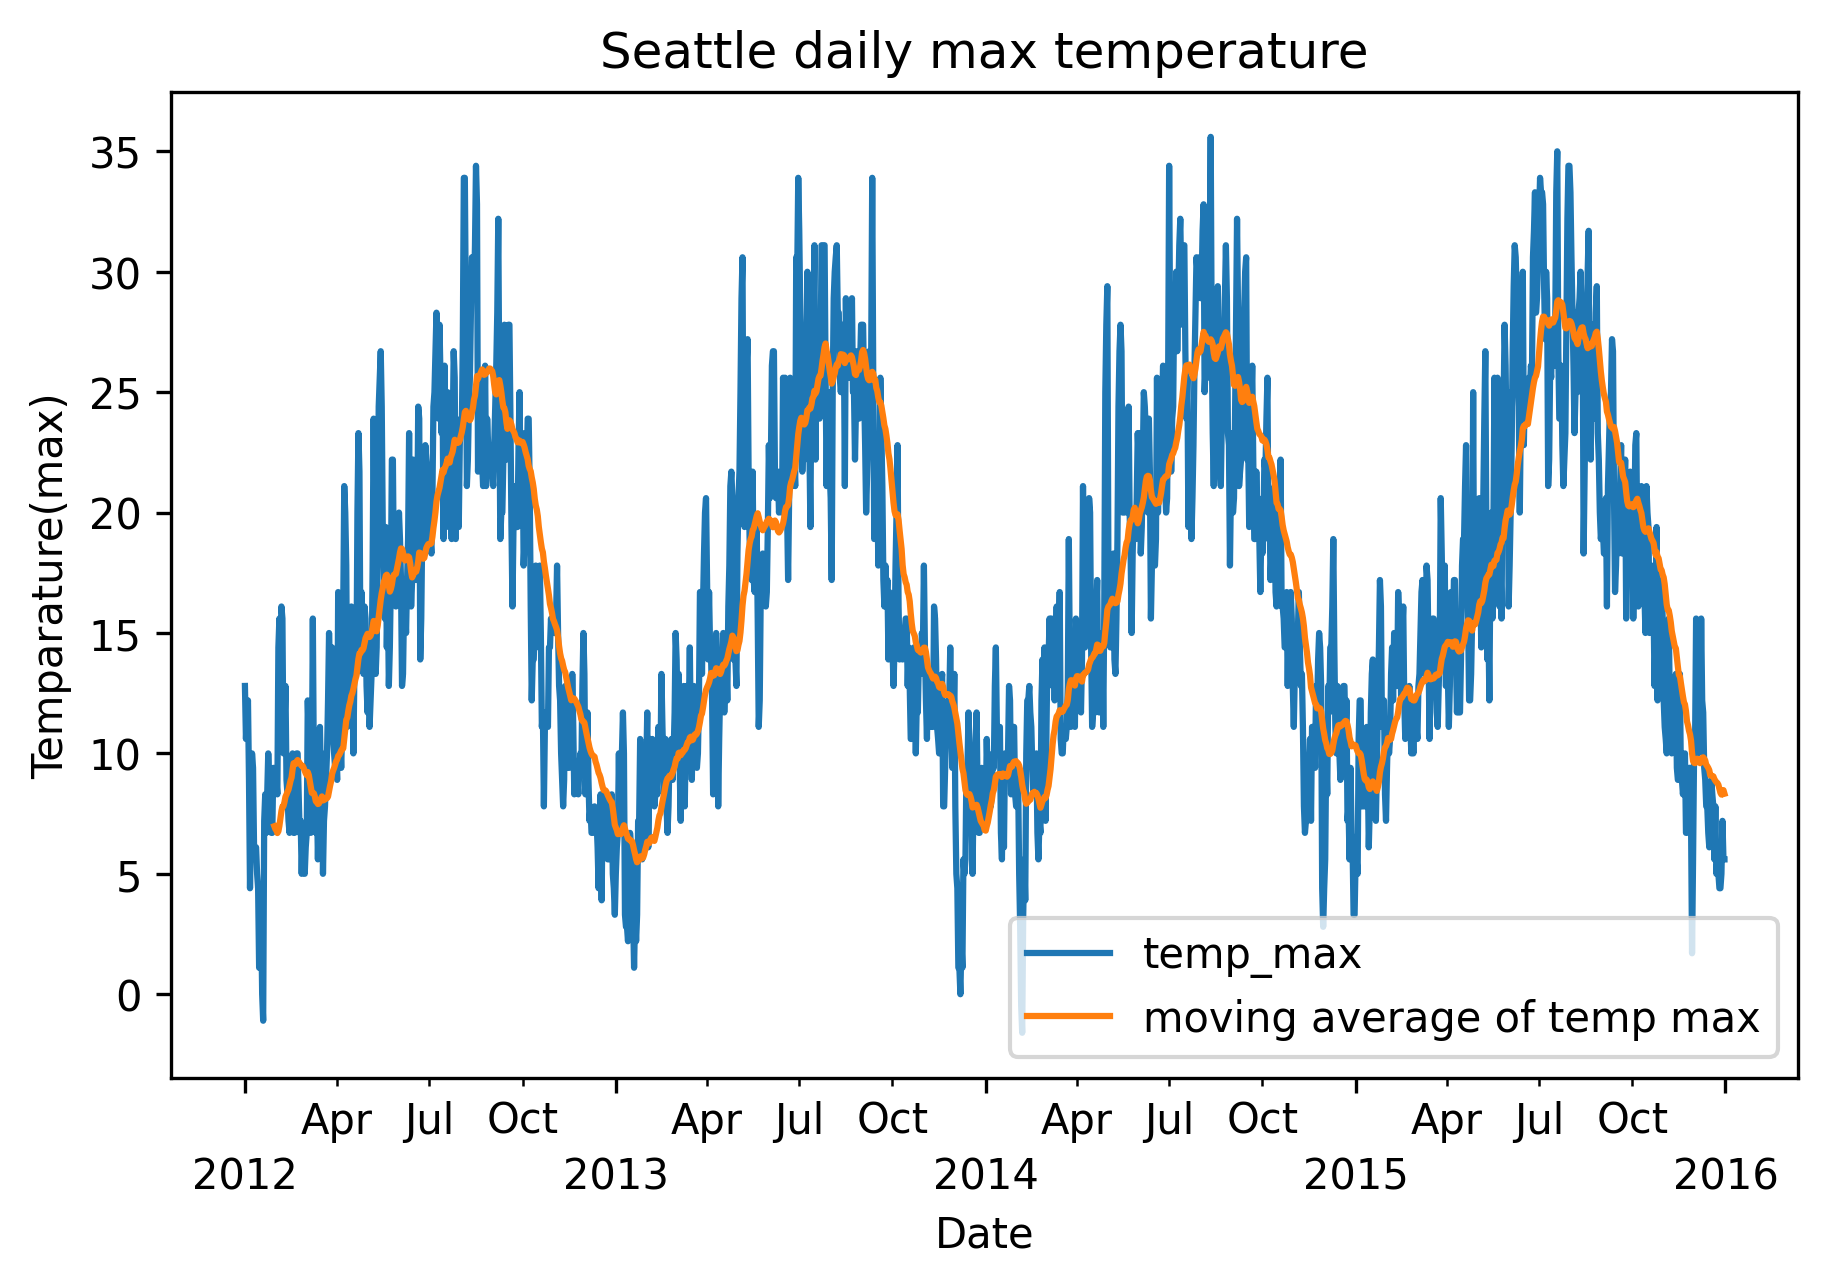

In [53]:
fig,ax=plt.subplots(figsize=(7,4.5),dpi=300)
ax.plot(df['temp_max'],label="temp_max")
ax.plot(df['temp_max_ma'],label="moving average of temp max")
ax.xaxis.set_major_locator(dt.YearLocator())
ax.xaxis.set_minor_locator(dt.MonthLocator((1,4,7,10)))

ax.xaxis.set_major_formatter(dt.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(dt.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(),rotation=0,ha="center")
plt.subplots_adjust(bottom=0.15)

plt.xlabel("Date")
plt.ylabel("Temparature(max)")
plt.title("Seattle daily max temperature")
plt.legend()
plt.show()
fig.savefig("output.png")
plt.close(fig)

coded by Meghana K